In [1]:
# Необходимые пакеты
import numpy as np
import pandas as pd
import mglearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Датасет
from sklearn.datasets import load_digits

# Модели для классификации
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Задание
Постройте классификатор рукописных цифр по данным digits из библиотеки scikit-learn,
оцените качество результата классификации, визуализируйте результат классификации в двумерной плоскости.

In [2]:
digits = load_digits()
df = pd.Series(digits)
X = digits.data
y = digits.target

print('Данные\n', X)
print('\nРазмер данных',X.shape)
print('\nКлассы', y)

Данные
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Размер данных (1797, 64)

Классы [0 1 2 ... 8 9 8]


In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X, y) # Находит наиболее частовстречающийся класс (баланс классов)
pred_most_frequent = dummy_majority.predict(X)
print("Баланс классов в датасете")
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Точность на тестовом наборе: {:.2f}%".format(100*dummy_majority.score(X, y)))

Баланс классов в датасете
Уникальные спрогнозированные метки: [3]
Точность на тестовом наборе: 10.18%


В данном датасете у цифры 4 наибольшее содержание

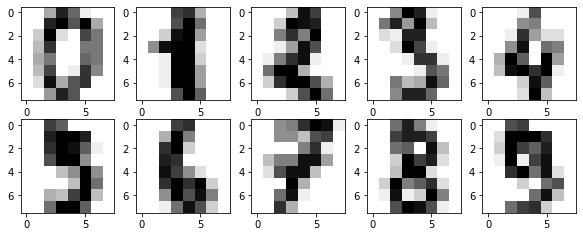

In [5]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(8,8), cmap='binary')
    plt.axis('off')

In [29]:
# Разбиваем на обуч. и тест. выборки для обучения и оценки точности работы моделей
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.7)

# Метод k-ближайших соседей

In [59]:
# Используем сперва самый простой классификатор - классификатор ближ. соседей
KNNC = KNeighborsClassifier().fit(X_train, y_train)
print('Точность на обучении {:.2f}%'.format(100*KNNC.score(X_train, y_train)))
print('Точность на тесте {:.2f}%'.format(100*KNNC.score(X_test, y_test)))

preds = KNNC.predict(X_test)
f1_score(y_test, preds, average='macro')
confusion_matrix(y_test, preds)

Точность на обучении 98.65%
Точность на тесте 99.07%


array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]], dtype=int64)

# Случаный лес

In [60]:
RFC = RandomForestClassifier(random_state = 1).fit(X_train, y_train)
print('Точность на обучении {:.2f}%'.format(100*RFC.score(X_train, y_train)))
print('Точность на тесте {:.2f}%'.format(100*RFC.score(X_test, y_test)))

preds = RFC.predict(X_test)
f1_score(y_test, preds, average='macro')
confusion_matrix(y_test, preds)

Точность на обучении 100.00%
Точность на тесте 97.96%


array([[57,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 55]], dtype=int64)

# Метод опорных векторов 

РБФ

In [61]:
svc = SVC(kernel = 'rbf').fit(X_train, y_train)
print('Точность на обучении {:.2f}%'.format(100*svc.score(X_train, y_train)))
print('Точность на тесте {:.2f}%'.format(100*svc.score(X_test, y_test)))

preds = svc.predict(X_test)
f1_score(y_test, preds, average='macro')
confusion_matrix(y_test, preds)

Точность на обучении 99.52%
Точность на тесте 98.52%


array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 55]], dtype=int64)

Линейная модель

In [62]:
svc = SVC(kernel = 'linear').fit(X_train, y_train)
print('Точность на обучении {:.2f}%'.format(100*svc.score(X_train, y_train)))
print('Точность на тесте {:.2f}%'.format(100*svc.score(X_test, y_test)))

preds = svc.predict(X_test)
f1_score(y_test, preds, average='macro')
confusion_matrix(y_test, preds)

Точность на обучении 100.00%
Точность на тесте 98.15%


array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 43,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 54]], dtype=int64)